# How to plot data from NES

In [1]:
import nes
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
file_path = "/gpfs/projects/bsc32/models/NES_tutorial_data/sconcno2-000_2019010100.nc"

In [3]:
nessy = nes.open_netcdf(file_path)

In [4]:
nessy.load()

## 1. Plot using contourf

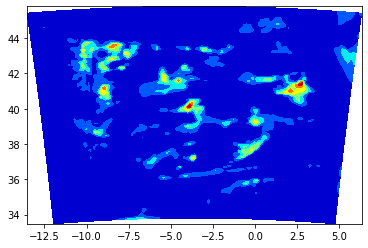

In [5]:
ax = plt.axes()
plt.contourf(nessy.lon['data'], nessy.lat['data'], nessy.variables['sconcno2']['data'][0,0], cmap='jet')

## 2. Plot using pcolormesh

### 2.1. With coordinates (warning)

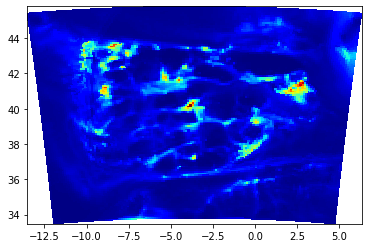

In [6]:
ax = plt.axes()
plt.pcolormesh(nessy.lon['data'], nessy.lat['data'], nessy.variables['sconcno2']['data'][0,0], 
               shading='auto', cmap='jet')

### 2.2. With coordinates bounds

In [7]:
nessy.create_spatial_bounds()
lon_bnds, lat_bnds = nessy.get_spatial_bounds_mesh_format()

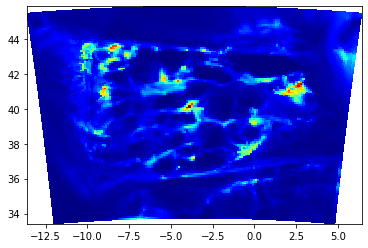

In [8]:
ax = plt.axes()
plt.pcolormesh(lon_bnds, lat_bnds, nessy.variables['sconcno2']['data'][0,0], cmap='jet')

## 2.3. Creating a shapefile

In [9]:
nessy.create_shapefile()

geometry
FID                                                     
0      POLYGON ((-12.00844 33.41901, -11.88982 33.428...
1      POLYGON ((-11.88982 33.42830, -11.77116 33.437...
2      POLYGON ((-11.77116 33.43746, -11.65248 33.446...
3      POLYGON ((-11.65248 33.44650, -11.53377 33.455...
4      POLYGON ((-11.53377 33.45539, -11.41505 33.464...
...                                                  ...
17056  POLYGON ((5.70038 45.40981, 5.84126 45.39939, ...
17057  POLYGON ((5.84126 45.39939, 5.98210 45.38881, ...
17058  POLYGON ((5.98210 45.38881, 6.12288 45.37808, ...
17059  POLYGON ((6.12288 45.37808, 6.26361 45.36719, ...
17060  POLYGON ((6.26361 45.36719, 6.40430 45.35615, ...

[17061 rows x 1 columns]

In [10]:
nessy.shapefile['sconcno2'] = nessy.variables['sconcno2']['data'][0, 0, :].ravel()
nessy.shapefile

geometry  sconcno2
FID                                                               
0      POLYGON ((-12.00844 33.41901, -11.88982 33.428...  0.000896
1      POLYGON ((-11.88982 33.42830, -11.77116 33.437...  0.000930
2      POLYGON ((-11.77116 33.43746, -11.65248 33.446...  0.000961
3      POLYGON ((-11.65248 33.44650, -11.53377 33.455...  0.000989
4      POLYGON ((-11.53377 33.45539, -11.41505 33.464...  0.001015
...                                                  ...       ...
17056  POLYGON ((5.70038 45.40981, 5.84126 45.39939, ...  0.009605
17057  POLYGON ((5.84126 45.39939, 5.98210 45.38881, ...  0.008114
17058  POLYGON ((5.98210 45.38881, 6.12288 45.37808, ...  0.006802
17059  POLYGON ((6.12288 45.37808, 6.26361 45.36719, ...  0.008189
17060  POLYGON ((6.26361 45.36719, 6.40430 45.35615, ...  0.009688

[17061 rows x 2 columns]

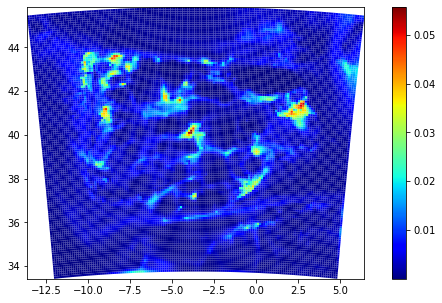

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 5))
gdf_grid = nessy.shapefile.dropna()
gdf_grid.plot(ax=ax, column='sconcno2', cmap='jet', legend=True)
ax.margins(0)